In [36]:
import numpy as np
import pandas as pd
from geopandas import GeoDataFrame, GeoSeries
from shapely.geometry import Point

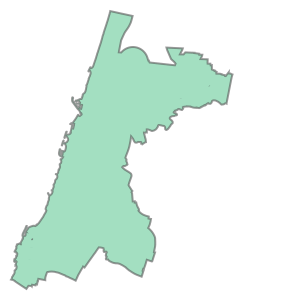

In [37]:
import geopandas as gpd
n = gpd.read_file('data/tlv_neighborhoods/Neighbourhoods.shp')
n[['geometry']].unary_union

In [38]:
df = pd.read_csv('data/df_with_neis2.csv')
df

,vehicle_id,order_id,shiryun_cat,avg_dist,billing_minutes,orig_addr,dest_addr,start_dt,end_dt,kmh,...,dest_y,orig_x_merc,orig_y_merc,dest_x_merc,dest_y_merc,start_hour,start_dayofweek,start_month,orig_nei,dest_nei
0,46-525-81,60386,שריון חינמי,8,12.92,"גורדון 86-88, תל אביב יפו, ישראל","הרב רובינשטיין 61, תל אביב יפו, ישראל",2017-10-23 00:08:53.000,2017-10-23 00:31:40.370,37.151703,...,34.758172,3.871605e+06,3.773914e+06,3.869262e+06,3.767998e+06,0,Monday,October,הצפון הישן-החלק הדרומי,(יפו ד' (גבעת התמרים
1,48-437-81,60387,שריון חינמי,3,8.35,"יעקב אפטר 3, תל אביב יפו, ישראל","ז'בוטינסקי 10, תל אביב יפו, ישראל",2017-10-23 00:09:14.000,2017-10-23 00:21:42.180,21.556886,...,34.773431,3.872719e+06,3.777111e+06,3.870961e+06,3.775076e+06,0,Monday,October,'תכנית ל,הצפון הישן - החלק הצפוני
2,63-887-81,60388,שריון חינמי,0,1.62,"רופין 32-34, תל אביב יפו, ישראל","רופין 32-34, תל אביב יפו, ישראל",2017-10-23 00:10:00.000,2017-10-23 00:15:23.940,0.000000,...,34.771051,3.870696e+06,3.774292e+06,3.870696e+06,3.774292e+06,0,Monday,October,הצפון הישן-החלק הדרומי,הצפון הישן-החלק הדרומי
3,63-906-81,60389,שריון חינמי,4,9.15,"שדרות מסריק 19, תל אביב יפו, ישראל","אונקלוס 3, תל אביב יפו, ישראל",2017-10-23 00:12:25.000,2017-10-23 00:23:28.590,26.229508,...,34.795691,3.871572e+06,3.773715e+06,3.873439e+06,3.775888e+06,0,Monday,October,הצפון הישן-החלק הדרומי,בבלי
4,60-589-55,60390,שריון חינמי,2,6.43,"הירקון 188, תל אביב יפו, ישראל","גורדון 83-85, תל אביב יפו, ישראל",2017-10-23 00:12:55.000,2017-10-23 00:21:58.113,18.662519,...,34.779303,3.870736e+06,3.774796e+06,3.871614e+06,3.773920e+06,0,Monday,October,הצפון הישן - החלק הצפוני,הצפון הישן-החלק הדרומי
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136326,63-896-81,240593,שריון חינמי,3,10.17,"צקלג 19, תל אביב יפו, ישראל","ויצמן‬ 56, תל אביב יפו, ישראל",2018-04-30 23:48:58.000,2018-05-01 00:03:05.740,17.699115,...,34.790561,3.872026e+06,3.772071e+06,3.872868e+06,3.775061e+06,23,Monday,April,לב תל-אביב,הצפון החדש-סביבת ככר המדינה
136327,46-560-81,240594,שריון חינמי,0,4.67,"אייזיק רמבה 28, תל אביב יפו, ישראל","13ביתן, תל אביב יפו",2018-04-30 23:49:05.000,2018-04-30 23:57:12.903,0.000000,...,34.770140,3.874996e+06,3.777424e+06,3.870594e+06,3.771259e+06,23,Monday,April,מרכז הירידים,נוה צדק
136328,71-785-55,240596,שריון חינמי,2,6.93,"מגן אברהם 16, תל אביב יפו, ישראל","פלורנטין 31, תל אביב יפו, ישראל",2018-04-30 23:52:11.000,2018-05-01 00:03:48.657,17.316017,...,34.769888,3.869130e+06,3.769925e+06,3.870566e+06,3.770709e+06,23,Monday,April,צפון יפו,פלורנטין
136329,71-806-55,240598,שריון חינמי,6,15.85,"שדרות בן גוריון 55, תל אביב יפו, ישראל","רבינא, תל אביב יפו, ישראל",2018-04-30 23:55:12.000,2018-05-01 00:15:40.763,22.712934,...,34.797884,3.871131e+06,3.774391e+06,3.873683e+06,3.779260e+06,23,Monday,April,הצפון הישן - החלק הצפוני,נוה אביבים וסביבתה


In [39]:
orig_geometry = [Point(xy) for xy in zip(df.orig_x_merc, df.orig_y_merc)]
orig_gs = GeoSeries(orig_geometry)


In [40]:
ins = []
for i, nei in n.geometry.iteritems():
    ins.append(orig_gs.intersects(nei))

In [41]:
orig_point_ins = pd.concat(ins, axis=1, keys=n.shemshchun.tolist())
orig_point_ins = orig_point_ins.idxmax(axis=1)
df['orig_nei'] = orig_point_ins

In [42]:
orig_point_ins_ids = pd.concat(ins, axis=1, keys=n.msshchuna.tolist())
orig_point_ins_ids = orig_point_ins_ids.idxmax(axis=1)
df['origin_nei_id'] = orig_point_ins_ids

In [43]:
export = pd.read_csv('data/export.csv', engine='python')
tlv_neighborhoods = (export[["ms_shchuna", "shem_shchuna", "Shape_Area","population"]]).rename(columns = {"ms_shchuna": "origin_nei_id", "shem_shchuna":"orig_nei_name","Shape_Area":"orig_nei_area","population":"orig_nei_popu"})

In [44]:
df = df.merge(tlv_neighborhoods, on=['origin_nei_id'])
df

,vehicle_id,order_id,shiryun_cat,avg_dist,billing_minutes,orig_addr,dest_addr,start_dt,end_dt,kmh,...,dest_y_merc,start_hour,start_dayofweek,start_month,orig_nei,dest_nei,origin_nei_id,orig_nei_name,orig_nei_area,orig_nei_popu
0,46-525-81,60386,שריון חינמי,8,12.92,"גורדון 86-88, תל אביב יפו, ישראל","הרב רובינשטיין 61, תל אביב יפו, ישראל",2017-10-23 00:08:53.000,2017-10-23 00:31:40.370,37.151703,...,3.767998e+06,0,Monday,October,הצפון הישן-החלק הדרומי,(יפו ד' (גבעת התמרים,31.0,הצפון הישן-החלק הדרומי,1348333.357,29394
1,63-887-81,60388,שריון חינמי,0,1.62,"רופין 32-34, תל אביב יפו, ישראל","רופין 32-34, תל אביב יפו, ישראל",2017-10-23 00:10:00.000,2017-10-23 00:15:23.940,0.000000,...,3.774292e+06,0,Monday,October,הצפון הישן-החלק הדרומי,הצפון הישן-החלק הדרומי,31.0,הצפון הישן-החלק הדרומי,1348333.357,29394
2,63-906-81,60389,שריון חינמי,4,9.15,"שדרות מסריק 19, תל אביב יפו, ישראל","אונקלוס 3, תל אביב יפו, ישראל",2017-10-23 00:12:25.000,2017-10-23 00:23:28.590,26.229508,...,3.775888e+06,0,Monday,October,הצפון הישן-החלק הדרומי,בבלי,31.0,הצפון הישן-החלק הדרומי,1348333.357,29394
3,63-887-81,60391,שריון חינמי,4,12.35,"רופין 32-34, תל אביב יפו, ישראל","רציף העלייה השניה 2-8, תל אביב יפו, ישראל",2017-10-23 00:15:48.000,2017-10-23 00:28:45.000,19.433198,...,3.770624e+06,0,Monday,October,הצפון הישן-החלק הדרומי,צפון יפו,31.0,הצפון הישן-החלק הדרומי,1348333.357,29394
4,71-783-55,60398,שריון חינמי,7,11.60,"צפת 1-7, תל אביב יפו, ישראל","שדרות לוי אשכול 118, תל אביב יפו, ישראל",2017-10-23 02:04:37.000,2017-10-23 02:22:43.430,36.206897,...,3.779260e+06,2,Monday,October,הצפון הישן-החלק הדרומי,נופי ים,31.0,הצפון הישן-החלק הדרומי,1348333.357,29394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136326,63-853-81,196797,שריון חינמי,2,8.55,"הבלונים, תל אביב יפו, ישראל","לסקר 13-21, תל אביב יפו, ישראל",2018-03-22 09:03:40.000,2018-03-22 09:18:02.057,14.035088,...,3.769671e+06,9,Thursday,March,פארק דרום,שפירא,66.0,פארק דרום,1107966.287,100
136327,46-558-81,198866,שריון חינמי,6,22.58,"הבלונים, תל אביב יפו, ישראל","שדרות רוטשילד 71, תל אביב יפו, ישראל",2018-03-24 00:10:09.000,2018-03-24 00:41:02.017,15.943313,...,3.771941e+06,0,Saturday,March,פארק דרום,לב תל-אביב,66.0,פארק דרום,1107966.287,100
136328,63-906-81,204621,שריון חינמי,28,194.83,"שתולים 73, תל אביב יפו, ישראל","שתולים 64, תל אביב יפו, ישראל",2018-03-29 12:55:29.000,2018-03-29 16:11:08.930,8.622902,...,3.768960e+06,12,Thursday,March,פארק דרום,פארק דרום,66.0,פארק דרום,1107966.287,100
136329,63-906-81,204813,שריון חינמי,9,34.22,"שתולים 64, תל אביב יפו, ישראל","גרץ 2, תל אביב יפו, ישראל",2018-03-29 16:38:16.000,2018-03-29 17:21:37.713,15.780245,...,3.774464e+06,16,Thursday,March,פארק דרום,הצפון הישן - החלק הצפוני,66.0,פארק דרום,1107966.287,100


In [45]:
(df["orig_nei"] != df["orig_nei_name"]).sum()

0

In [46]:
a = df[df["orig_addr_c"] == "צפת 1, תל אביב יפו, ישראל"][["orig_nei_name"]] == "הצפון הישן-החלק הדרומי"
a.sum() == 139

orig_nei_name    True
dtype: bool

In [47]:
dest_geometry = [Point(xy) for xy in zip(df.dest_x_merc, df.dest_y_merc)]
dest_gs = GeoSeries(dest_geometry)

In [48]:
dest_ins = []
for i, nei in n.geometry.iteritems():
    dest_ins.append(dest_gs.intersects(nei))

In [49]:
dest_point_ins = pd.concat(dest_ins, axis=1, keys=n.shemshchun.tolist())
dest_point_ins = dest_point_ins.idxmax(axis=1)
dest_point_ins
df['dest_nei'] = dest_point_ins

In [50]:
dest_point_ins_ids = pd.concat(dest_ins, axis=1, keys=n.msshchuna.tolist())
dest_point_ins_ids = dest_point_ins_ids.idxmax(axis=1)
dest_point_ins_ids
df['dest_nei_id'] = dest_point_ins_ids

In [51]:
export = pd.read_csv('data/export.csv', engine='python')
tlv_neighborhoods = (export[["ms_shchuna", "shem_shchuna", "Shape_Area","population"]]).rename(columns = {"ms_shchuna": "dest_nei_id", "shem_shchuna":"dest_nei_name","Shape_Area":"dest_nei_area","population":"dest_nei_popu"})

In [52]:
df = df.merge(tlv_neighborhoods, on=['dest_nei_id'])
df

,vehicle_id,order_id,shiryun_cat,avg_dist,billing_minutes,orig_addr,dest_addr,start_dt,end_dt,kmh,...,orig_nei,dest_nei,origin_nei_id,orig_nei_name,orig_nei_area,orig_nei_popu,dest_nei_id,dest_nei_name,dest_nei_area,dest_nei_popu
0,46-525-81,60386,שריון חינמי,8,12.92,"גורדון 86-88, תל אביב יפו, ישראל","הרב רובינשטיין 61, תל אביב יפו, ישראל",2017-10-23 00:08:53.000,2017-10-23 00:31:40.370,37.151703,...,הצפון הישן-החלק הדרומי,(יפו ד' (גבעת התמרים,31.0,הצפון הישן-החלק הדרומי,1.348333e+06,29394,49.0,(יפו ד' (גבעת התמרים,389591.6863,6631
1,46-549-81,60953,שריון חינמי,6,19.05,"שדרות מסריק 19, תל אביב יפו, ישראל","הרב רובינשטיין 63, תל אביב יפו, ישראל",2017-10-24 04:01:12.000,2017-10-24 04:24:45.240,18.897638,...,הצפון הישן-החלק הדרומי,(יפו ד' (גבעת התמרים,31.0,הצפון הישן-החלק הדרומי,1.348333e+06,29394,49.0,(יפו ד' (גבעת התמרים,389591.6863,6631
2,60-609-55,66006,שריון חינמי,8,13.12,"נצח ישראל 6, תל אביב יפו, ישראל","סומקן 34, תל אביב יפו, ישראל",2017-11-02 02:19:45.000,2017-11-02 02:41:30.513,36.585366,...,הצפון הישן-החלק הדרומי,(יפו ד' (גבעת התמרים,31.0,הצפון הישן-החלק הדרומי,1.348333e+06,29394,49.0,(יפו ד' (גבעת התמרים,389591.6863,6631
3,60-589-55,67326,שריון חינמי,8,12.70,"נצח ישראל 6, תל אביב יפו, ישראל","הרב רובינשטיין 61, תל אביב יפו, ישראל",2017-11-04 03:54:18.000,2017-11-04 04:14:54.977,37.795276,...,הצפון הישן-החלק הדרומי,(יפו ד' (גבעת התמרים,31.0,הצפון הישן-החלק הדרומי,1.348333e+06,29394,49.0,(יפו ד' (גבעת התמרים,389591.6863,6631
4,63-879-81,69181,שריון חינמי,6,18.67,"שדרות ח""ן 7, תל אביב יפו, ישראל","סומקן 34, תל אביב יפו, ישראל",2017-11-07 00:24:40.000,2017-11-07 00:50:09.500,19.282271,...,הצפון הישן-החלק הדרומי,(יפו ד' (גבעת התמרים,31.0,הצפון הישן-החלק הדרומי,1.348333e+06,29394,49.0,(יפו ד' (גבעת התמרים,389591.6863,6631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136326,71-793-55,206494,שריון חינמי,11,41.28,"דרך ההגנה 131-135, תל אביב יפו, ישראל","דרך ההגנה 124, תל אביב יפו, ישראל",2018-03-31 13:06:31.000,2018-03-31 13:53:19.120,15.988372,...,אורות,"נוה ברבור, כפר שלם מערב",61.0,אורות,2.772342e+05,384,68.0,"נוה ברבור, כפר שלם מערב",239869.3610,5066
136327,48-457-81,207430,שריון חינמי,43,153.32,"דרך ההגנה 131-135, תל אביב יפו, ישראל","דרך ההגנה 124, תל אביב יפו, ישראל",2018-04-01 14:25:36.000,2018-04-01 17:02:51.613,16.827550,...,אורות,"נוה ברבור, כפר שלם מערב",61.0,אורות,2.772342e+05,384,68.0,"נוה ברבור, כפר שלם מערב",239869.3610,5066
136328,48-419-81,194988,שריון חינמי,1,5.97,"צוקרמן 11-19, תל אביב יפו, ישראל","אסא קדמוני 2, תל אביב יפו, ישראל",2018-03-20 16:52:19.000,2018-03-20 16:59:38.767,10.050251,...,נוה אליעזר וכפר שלם מזרח,"נוה ברבור, כפר שלם מערב",69.0,נוה אליעזר וכפר שלם מזרח,3.307963e+05,6693,68.0,"נוה ברבור, כפר שלם מערב",239869.3610,5066
136329,71-822-55,219682,שריון חינמי,7,40.33,"הרב יוסף צוברי 21, תל אביב יפו, ישראל","דרך ההגנה 124, תל אביב יפו, ישראל",2018-04-12 18:11:51.000,2018-04-12 19:01:09.560,10.414084,...,נוה אליעזר וכפר שלם מזרח,"נוה ברבור, כפר שלם מערב",69.0,נוה אליעזר וכפר שלם מזרח,3.307963e+05,6693,68.0,"נוה ברבור, כפר שלם מערב",239869.3610,5066


In [63]:
(df[df["dest_addr_c"] == "צפת 1, תל אביב יפו, ישראל"][["dest_nei_name"]] == "הצפון הישן-החלק הדרומי").sum() == 88


dest_nei_name    True
dtype: bool

In [60]:
(df[df["dest_addr_c"] == "בבלי 7, תל אביב יפו, ישראל"][["dest_nei"]]=="בבלי").sum() == 15

dest_nei    True
dtype: bool

In [55]:
df.to_csv('data/df_with_neis_details.csv', index=False)

In [56]:
df[df["dest_nei"] != df["dest_nei_name"]][["dest_nei_name", "dest_nei"]]


,dest_nei_name,dest_nei


In [57]:
a = df["dest_nei_name"]
b = df["dest_nei"]
(a!=b).sum()

0